# Análise do eleitorado brasileiro

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('eleitorado_municipio_2020.csv', sep=';', encoding='latin1')
df.head()

,NR_ANO_ELEICAO,CD_PAIS,NM_PAIS,SG_REGIAO,NM_REGIAO,SG_UF,NM_UF,CD_MUNICIPIO,NM_MUNICIPIO,QTD_ELEITORES,...,QTD_ELEITORES_90A94,QTD_ELEITORES_95A99,QTD_ELEITORES_MAIORIGUAL100,QTD_ELEITORES_IDADEINVALIDO,QTD_ELEITORES_IDADENAOSEAPLICA,QTD_ELEITORES_IDADENAOINFORMADA,QTD_ELEITORES_COMBIOMETRIA,QTD_ELEITORES_SEMBIOMETRIA,QTD_ELEITORES_DEFICIENTE,QUANTITATIVO_NOMESOCIAL
0,2020,1,Brasil,N,Norte,AC,Acre,1120,ACRELÂNDIA,9169,...,10,1,0,0,0,0,9101,68,39,0
1,2020,1,Brasil,N,Norte,AC,Acre,1570,ASSIS BRASIL,5913,...,15,4,1,0,0,0,5862,51,16,0
2,2020,1,Brasil,N,Norte,AC,Acre,1058,BRASILÉIA,16844,...,22,5,7,0,0,0,16638,206,126,0
3,2020,1,Brasil,N,Norte,AC,Acre,1007,BUJARI,9613,...,13,4,0,0,0,0,9576,37,25,0
4,2020,1,Brasil,N,Norte,AC,Acre,1015,CAPIXABA,7540,...,11,2,0,0,0,0,7476,64,86,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   NR_ANO_ELEICAO                   5568 non-null   int64 
 1   CD_PAIS                          5568 non-null   int64 
 2   NM_PAIS                          5568 non-null   object
 3   SG_REGIAO                        5568 non-null   object
 4   NM_REGIAO                        5568 non-null   object
 5   SG_UF                            5568 non-null   object
 6   NM_UF                            5568 non-null   object
 7   CD_MUNICIPIO                     5568 non-null   int64 
 8   NM_MUNICIPIO                     5568 non-null   object
 9   QTD_ELEITORES                    5568 non-null   int64 
 10  QTD_ELEITORES_FEMININO           5568 non-null   int64 
 11  QTD_ELEITORES_MASCULINO          5568 non-null   int64 
 12  QTD_ELEITORES_NAOINFORMADO       5

In [4]:
# cidade com maior quantidade de eleitores deficientes
df.nlargest(5, 'QTD_ELEITORES_DEFICIENTE')

,NR_ANO_ELEICAO,CD_PAIS,NM_PAIS,SG_REGIAO,NM_REGIAO,SG_UF,NM_UF,CD_MUNICIPIO,NM_MUNICIPIO,QTD_ELEITORES,...,QTD_ELEITORES_90A94,QTD_ELEITORES_95A99,QTD_ELEITORES_MAIORIGUAL100,QTD_ELEITORES_IDADEINVALIDO,QTD_ELEITORES_IDADENAOSEAPLICA,QTD_ELEITORES_IDADENAOINFORMADA,QTD_ELEITORES_COMBIOMETRIA,QTD_ELEITORES_SEMBIOMETRIA,QTD_ELEITORES_DEFICIENTE,QUANTITATIVO_NOMESOCIAL
5356,2020,1,Brasil,SE,Sudeste,SP,São Paulo,71072,SÃO PAULO,8986687,...,75281,51741,5889,77,0,0,5404466,3582221,154981,982
3658,2020,1,Brasil,SE,Sudeste,RJ,Rio de Janeiro,60011,RIO DE JANEIRO,4851887,...,76888,60445,3989,51,0,0,2495709,2356178,27263,283
4988,2020,1,Brasil,SE,Sudeste,SP,São Paulo,64777,GUARULHOS,872880,...,224,28,3,8,0,0,870016,2864,22659,97
535,2020,1,Brasil,NE,Nordeste,BA,Bahia,38490,SALVADOR,1897098,...,1613,302,54,7,0,0,1891978,5120,19486,135
4008,2020,1,Brasil,S,Sul,RS,Rio Grande do Sul,85995,CAXIAS DO SUL,333696,...,531,98,9,0,0,0,332752,944,17884,22


In [5]:
print('Eleitoras', df['QTD_ELEITORES_FEMININO'].sum())
print('Eleitores', df['QTD_ELEITORES_MASCULINO'].sum())
print('Não informado', df['QTD_ELEITORES_NAOINFORMADO'].sum())

Eleitoras 77649569
Eleitores 70228457
Não informado 40457


In [6]:
# criar variaveis para calcular o percentual
tot_eleitores = df['QTD_ELEITORES'].sum()
tot_fem = df['QTD_ELEITORES_FEMININO'].sum()
tot_masc = df['QTD_ELEITORES_MASCULINO'].sum()
tot_nao = df['QTD_ELEITORES_NAOINFORMADO'].sum()

In [7]:
# Valores percentuais
print('Eleitoras', ((tot_fem / tot_eleitores) * 100).round(2))
print('Eleitores', ((tot_masc / tot_eleitores) * 100).round(2))
print('Não informado', ((tot_nao / tot_eleitores) * 100).round(2))

Eleitoras 52.49
Eleitores 47.48
Não informado 0.03


In [9]:
# quantos municípios com mais homens que mulheres
df[df['QTD_ELEITORES_MASCULINO'] > df['QTD_ELEITORES_FEMININO']].count()

NR_ANO_ELEICAO                     2171
CD_PAIS                            2171
NM_PAIS                            2171
SG_REGIAO                          2171
NM_REGIAO                          2171
SG_UF                              2171
NM_UF                              2171
CD_MUNICIPIO                       2171
NM_MUNICIPIO                       2171
QTD_ELEITORES                      2171
QTD_ELEITORES_FEMININO             2171
QTD_ELEITORES_MASCULINO            2171
QTD_ELEITORES_NAOINFORMADO         2171
QTD_ELEITORES_MENOR16              2171
QTD_ELEITORES_16                   2171
QTD_ELEITORES_17                   2171
QTD_ELEITORES_18                   2171
QTD_ELEITORES_19                   2171
QTD_ELEITORES_20                   2171
QTD_ELEITORES_21A24                2171
QTD_ELEITORES_25A29                2171
QTD_ELEITORES_30A34                2171
QTD_ELEITORES_35A39                2171
QTD_ELEITORES_40A44                2171
QTD_ELEITORES_45A49                2171


In [10]:
# criar nova coluna para indicar a relação fem/masc
df['RELACAO_FM'] = df['QTD_ELEITORES_FEMININO'] / df['QTD_ELEITORES_MASCULINO']

In [11]:
# Municípios com maior relação F/M
df.nlargest(5, 'RELACAO_FM').T

,3651,2892,535,3638,67
NR_ANO_ELEICAO,2020,2020,2020,2020,2020
CD_PAIS,1,1,1,1,1
NM_PAIS,Brasil,Brasil,Brasil,Brasil,Brasil
SG_REGIAO,SE,NE,NE,SE,NE
NM_REGIAO,Sudeste,Nordeste,Nordeste,Sudeste,Nordeste
SG_UF,RJ,PE,BA,RJ,AL
NM_UF,Rio de Janeiro,Pernambuco,Bahia,Rio de Janeiro,Alagoas
CD_MUNICIPIO,58122,24910,38490,58653,27855
NM_MUNICIPIO,QUEIMADOS,OLINDA,SALVADOR,NITERÓI,MACEIÓ
QTD_ELEITORES,87662,282952,1897098,391268,592388


In [12]:
df.nsmallest(5, 'RELACAO_FM').T

,2395,1236,2361,2388,2345
NR_ANO_ELEICAO,2020,2020,2020,2020,2020
CD_PAIS,1,1,1,1,1
NM_PAIS,Brasil,Brasil,Brasil,Brasil,Brasil
SG_REGIAO,CO,NE,CO,CO,CO
NM_REGIAO,Centro-Oeste,Nordeste,Centro-Oeste,Centro-Oeste,Centro-Oeste
SG_UF,MT,MA,MT,MT,MT
NM_UF,Mato Grosso,Maranhão,Mato Grosso,Mato Grosso,Mato Grosso
CD_MUNICIPIO,90921,7900,90948,90980,90387
NM_MUNICIPIO,SERRA NOVA DOURADA,MARAJÁ DO SENA,NOVO SANTO ANTÔNIO,SANTA CRUZ DO XINGU,NOVA BANDEIRANTES
QTD_ELEITORES,1578,6531,1775,1673,8859


In [13]:
df[df['CD_PAIS'] != 1]

,NR_ANO_ELEICAO,CD_PAIS,NM_PAIS,SG_REGIAO,NM_REGIAO,SG_UF,NM_UF,CD_MUNICIPIO,NM_MUNICIPIO,QTD_ELEITORES,...,QTD_ELEITORES_95A99,QTD_ELEITORES_MAIORIGUAL100,QTD_ELEITORES_IDADEINVALIDO,QTD_ELEITORES_IDADENAOSEAPLICA,QTD_ELEITORES_IDADENAOINFORMADA,QTD_ELEITORES_COMBIOMETRIA,QTD_ELEITORES_SEMBIOMETRIA,QTD_ELEITORES_DEFICIENTE,QUANTITATIVO_NOMESOCIAL,RELACAO_FM


<AxesSubplot:ylabel='Frequency'>

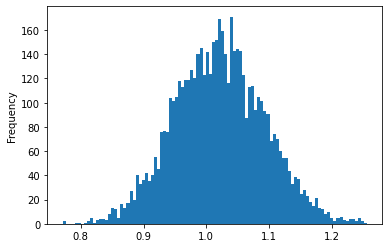

In [15]:
%matplotlib inline
# plotar um gráfico de distribuição da relação f/m
df['RELACAO_FM'].plot.hist(bins=100)

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

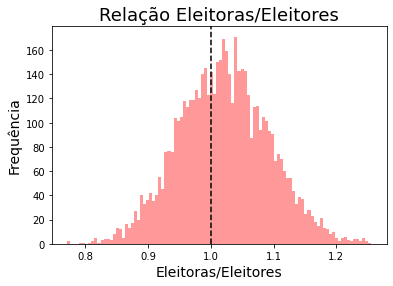

In [20]:
# plotar a distribuição da relação f/m
sns.distplot(df['RELACAO_FM'], bins=100, color='red', kde=False)

plt.title('Relação Eleitoras/Eleitores', fontsize=18)
plt.xlabel('Eleitoras/Eleitores', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.axvline(1.0, color='black', linestyle='--')

C:\Users\barba\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\barba\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\barba\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\barba\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\barba\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.9% of the points

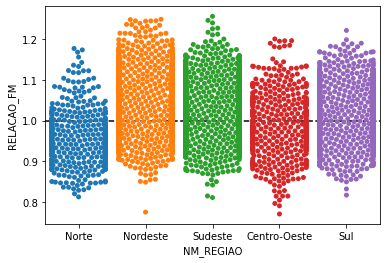

In [22]:
# verificar a distribuição f/m mas mostrando os pontos (municipios)
sns.swarmplot(data=df, x='NM_REGIAO', y='RELACAO_FM')
plt.axhline(1.0, color='black', linestyle='--')

In [23]:
# plotar a quantidade total de eleitores por faixa etária

lista = ['QTD_ELEITORES_16', 'QTD_ELEITORES_17', 'QTD_ELEITORES_18', 'QTD_ELEITORES_19', 'QTD_ELEITORES_20']
tot_idade = df[lista].sum()

In [24]:
tot_idade

QTD_ELEITORES_16     239961
QTD_ELEITORES_17     790602
QTD_ELEITORES_18    1531395
QTD_ELEITORES_19    2299649
QTD_ELEITORES_20    2859883
dtype: int64

<AxesSubplot:>

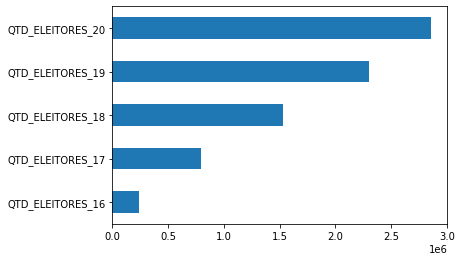

In [25]:
tot_idade.plot.barh()